<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/03_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git
! pip install cryptos
! pip install eciespy


Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 252 (delta 50), reused 23 (delta 23), pack-reused 186
Receiving objects: 100% (252/252), 11.95 MiB | 35.78 MiB/s, done.
Resolving deltas: 100% (162/162), done.
     |████████████████████████████████| 69 kB 3.3 MB/s 
     |████████████████████████████████| 2.0 MB 6.7 MB/s 
     |████████████████████████████████| 555 kB 45.6 MB/s 
     |████████████████████████████████| 104 kB 48.1 MB/s 
     |████████████████████████████████| 481 kB 53.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1231119 sha256=b6290175d12f458716cfd808fbe7b87ea5820cde25ceaa344d15783cc7539907
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
Successfully built cytoolz


In [28]:
 #! rm -r Colegio_Invisible

# Basic Cryptography and Script Writing

## Outline

In this deeper dive we cover:

- asymmetric cryptography
- advanced scripts

By the end of the exposition you will:

- understand the features of **asymmetric cryptography**
- be able to generate a new **private key** object
- be able to access the byte or hex value of the private key
- be able to import a previously generated **private key** from bytes
- be able to extract a **public key** from the private key
- be able to access the byte or hex value of the public key
- understand ECDSA digital signature
- be able to **sign** a message with a private key
- be able to **verify** a message signature with a public key
- understand ECIES
- be able to **ECIES encrypt** with a public key
- be able to **ECIES decrypt** with a private key

# Asymmetric Cryptography

Asymmetric cryptography, or public-key cryptography, is a system that uses pairs of keys: public keys (which may be known to others), and private keys (which may never be known by any except the owner).

- Public keys are generated from private keys
- Public keys are shown to others
- Private keys are held private

<div>
<img src="attachment:asymmetric.png" width="500"/>
</div>

**ENCRYPTION**
For encryption and decryption:
- the recipients public key is used to encrypt
- the recipients private key is used to decrypt

**DIGITAL SIGNATURE**
For signature and verification
- the sender's private key is used the sign the hash of a text to generate a signature
- the sender's public key is used to turn the signature back into the hash and compared to the hash of the text. if the hashes match then the text/signature/pubkey fit and the signature is deemed valid.

**ECC** and RSA are different kinds of asymmetric cryptography.
Elliptic-curve cryptography (ECC) is an approach to public-key cryptography based on the algebraic structure of elliptic curves over finite fields. ECC allows smaller keys compared to RSA.

**secp256k1** refers to the parameters of the elliptic curve used in Ethereum's, Bitcoin's, and their derivatives' public-key cryptography.

In [8]:
import ecies
import eth_keys

## Generate Private Key

In [5]:
#this generates a private key object
privKey1 = ecies.utils.generate_eth_key()
privKey1, type(privKey1)

('0xb04cb3971dcdbb255a591ee55d0819d39b1df63a0f0758e2228453f62445cecc',
 eth_keys.datatypes.PrivateKey)

In [6]:
#this generates a private key
privKey2 = ecies.utils.generate_eth_key()
privKey2, type(privKey2)

('0x1855ff2caad6bb232dad37779855bf7c17543bfa2c1279cd7f37cd8cf4e873ce',
 eth_keys.datatypes.PrivateKey)

## Dump Private Key Bytes

In [7]:
#here we can dump the contents of the private key as bytes
privKey1_bytes=privKey1.to_bytes()
privKey1_bytes,privKey1_bytes.hex()

(b'\xb0L\xb3\x97\x1d\xcd\xbb%ZY\x1e\xe5]\x08\x19\xd3\x9b\x1d\xf6:\x0f\x07X\xe2"\x84S\xf6$E\xce\xcc',
 'b04cb3971dcdbb255a591ee55d0819d39b1df63a0f0758e2228453f62445cecc')

## Import Previously Generated Private Key From Bytes

In [10]:
#here we are generating a key object from previously generated bytes
privKey1_copy=eth_keys.keys.PrivateKey(privKey1_bytes)
privKey1_copy,type(privKey1_copy)

('0xb04cb3971dcdbb255a591ee55d0819d39b1df63a0f0758e2228453f62445cecc',
 eth_keys.datatypes.PrivateKey)

## Generate Private Key and Save in AES Password Protected File Using a Python Script

In [35]:
! ls Colegio_Invisible/scripts
! cat Colegio_Invisible/scripts/ecc_generate.py

aes_decrypt.py	ecc_encrypt.py	 ecc_pubkey_extract.py	sha_256.py
aes_encrypt.py	ecc_generate.py  ecc_sign.py
ecc_decrypt.py	ecc_keydump.py	 ecc_verify.py
##################################################################################
# this script will generate an ECC private key from a computer generate 256 bit random number
# the key is saved to an AEC encrypted (password protected) file
#
# run at the terminal using the following
# > python ecc_generate.py <PRIVKEY_PATH> <PRIVKEY_PASSWORD>
# <PRIVKEY_PATH>: path to generated private key
# <PRIVKEY_PASSWORD>: password for private key file
#
#EXAMPLE:
#>python ecc_generate.py keys\privkey.bin password123
#
# IF <PRIVKEY_PASSWORD> IS NOT INCLUDED USER WILL BE PROMPTED TO ENTER IT SECURELY
##################################################################################

from sys import argv
import getpass
import ecies
import eth_keys
import hashlib
from Crypto.PublicKey import ECC
from Crypto.Random import get_random_bytes


if len(

In [4]:
! mkdir keys

In [5]:
! python Colegio_Invisible/scripts/ecc_generate.py keys/my_privkey.enc

Input password for encrypting keyfile: 
Repeat password for encrypting keyfile: 

Passwords match...
Private key generation complete
Private key encrypted and written to binary file: keys/my_privkey.enc
1df62ac4e8ba9cebe789a5844ddb0dd6020dfac371cb8c645d719a1892ebc862c9dbd2e1c7ed08b928e675c9828d65ba18b27f00d77ad0004243f13462b32c62


# Derive Public Key From Private Key

In [11]:
pubKey1=privKey1.public_key
pubKey1

'0xbd0ed05c9beb1a1e8728f4f00b8a71e6d75896f81832c5c15aa90bb821b915718840da48512cd59a06482a520250672b915aba238fe9d7d977535aa2f30ce2ab'

## Dump Public Key Bytes

In [13]:
pubKey1_bytes=pubKey1.to_bytes()
pubKey1_bytes

b'\xbd\x0e\xd0\\\x9b\xeb\x1a\x1e\x87(\xf4\xf0\x0b\x8aq\xe6\xd7X\x96\xf8\x182\xc5\xc1Z\xa9\x0b\xb8!\xb9\x15q\x88@\xdaHQ,\xd5\x9a\x06H*R\x02Pg+\x91Z\xba#\x8f\xe9\xd7\xd9wSZ\xa2\xf3\x0c\xe2\xab'

## Import Previously Generated Private Key From Bytes

In [16]:
pubKey1_import=eth_keys.keys.PublicKey(pubKey1_bytes)
pubKey1_import,type(pubKey1_import)

('0xbd0ed05c9beb1a1e8728f4f00b8a71e6d75896f81832c5c15aa90bb821b915718840da48512cd59a06482a520250672b915aba238fe9d7d977535aa2f30ce2ab',
 eth_keys.datatypes.PublicKey)

In [ ]:
! cat Colegio_Invisible/scripts/ecc_pubkey_extract.py

In [13]:
! python Colegio_Invisible/scripts/ecc_pubkey_extract.py keys/my_privkey.enc keys/my_pubkey.enc

Input password for private key file: 
Input password for public key file: 
Repeat password for public key file: 

Passwords match...
Completed public key extraction from: keys/my_privkey.enc
Public key encrypted and written to binary file: keys/my_pubkey.enc
dfe807a8b987d9fd8d344225d96514c6a513783e8480f9ebcffb9e9a42af0b9c468233ba572871e986db11ab980dbfff76a4c76e5f99635e0decc893610fc720d45fc0e5b64cccdecf2841747b69090c1dfcb34c1bd372467444fed77a88b7d9


In [14]:
! python Colegio_Invisible/scripts/ecc_keydump.py keys/my_pubkey.enc

Input password for key file: 
3d22a7e6c1b379e92387fdef77cdc9d3566c9def759a0179639d481b3faa1a03c3a0e41cb5f2334a437bfa990f0cf0236b3d63ed129de4df835f893c7a1a9596


In [8]:
pubkey=!{'python Colegio_Invisible/scripts/ecc_keydump.py keys/my_pubkey.enc'}
pubkey

['Input password for key file: ',
 '3d22a7e6c1b379e92387fdef77cdc9d3566c9def759a0179639d481b3faa1a03c3a0e41cb5f2334a437bfa990f0cf0236b3d63ed129de4df835f893c7a1a9596']

In [9]:
bytes.fromhex(pubkey[-1])

b'="\xa7\xe6\xc1\xb3y\xe9#\x87\xfd\xefw\xcd\xc9\xd3Vl\x9d\xefu\x9a\x01yc\x9dH\x1b?\xaa\x1a\x03\xc3\xa0\xe4\x1c\xb5\xf23JC{\xfa\x99\x0f\x0c\xf0#k=c\xed\x12\x9d\xe4\xdf\x83_\x89<z\x1a\x95\x96'

In [21]:
! ls Colegio_Invisible/scripts

aes_decrypt.py	ecc_generate.py  ecc_pubkey_extract.py	ecc_verify.py
aes_encrypt.py	ecc_keydump.py	 ecc_sign.py		sha_256.py


In [16]:
! python Colegio_Invisible/scripts/ecc_sign.py  keys/my_privkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg ic_img.sig

Success: Colegio_Invisible/img/colegio_invisible.jpeg signature complete using keys/my_privkey.enc
Written to: ic_img.sig
3922c64b7e39289dce4e29271160ed8746589e4ee320119458ff1d4e665dbf6d4031e82f60796fcb87368e3e2e328a0b1e7edfe61f58cbb4500142ca9083df0901


In [17]:
! python Colegio_Invisible/scripts/sha_256.py Colegio_Invisible/img/colegio_invisible.jpeg

Hashing complete
SHA256 of : Colegio_Invisible/img/colegio_invisible.jpeg
1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce


In [14]:
! cat Colegio_Invisible/scripts/ecc_verify.py

##################################################################################
# this script verifies the integrity of an ECDSA signature of a file, the file,
# and associated ECC public key
#
# run at the terminal using the following
# > python ecc_verify.py <PUBKEY_PATH> <PUBKEY_PASSWORD> <FILE_PATH> <SIGNATURE_PATH> 
# <PUBKEY_PATH>: path of password protected public key
# <PUBKEY_PASSWORD>: password for public key
# <FILE_PATH>: path of file that was signed
# <SIGNATURE_PATH>: path of signature file
#
#EXAMPLE:
#>python python ecc_verify.py keys\pubkey.bin pass1 note.txt signature.sig
#
# IF <PUBKEY_PASSWORD> IS NOT INCLUDED USER WILL BE PROMPTED TO ENTER IT SECURELY
##################################################################################

from sys import argv
import getpass
import ecies
import eth_keys
import hashlib


if len(argv)==5:
    _, pubkey_path, pubkey_password, file_path, signature_path = argv
elif len(argv)==4:
    _, pubkey_path, file_path, signature_pat

In [20]:
! python Colegio_Invisible/scripts/ecc_verify.py keys/my_pubkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg ic_img.sig

Success: keys/my_pubkey.enc Colegio_Invisible/img/colegio_invisible.jpeg and ic_img.sig agree
Signature is valid


In [30]:
! python Colegio_Invisible/scripts/ecc_encrypt.py keys/my_pubkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg colegio_invisible.enc

Success: Colegio_Invisible/img/colegio_invisible.jpeg encryption complete using keys/my_pubkey.enc
Written to: colegio_invisible.enc


In [33]:
! python Colegio_Invisible/scripts/ecc_decrypt.py keys/my_privkey.enc '' colegio_invisible.enc colegio_invisible_dec.jpeg

Success: colegio_invisible.enc decryption complete using keys/my_privkey.enc
Written to: colegio_invisible_dec.jpeg


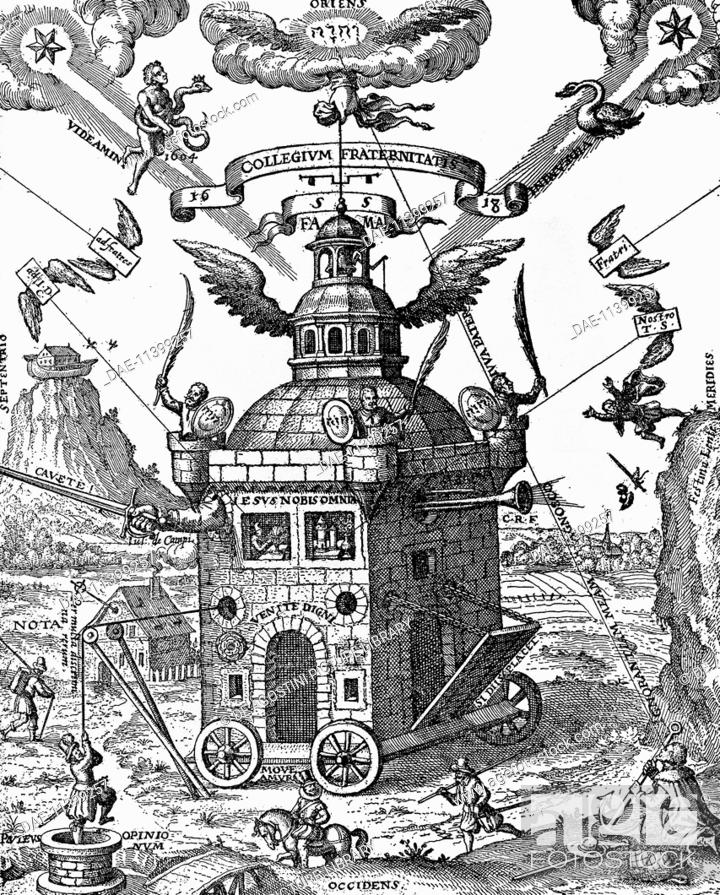

In [34]:
from IPython.display import Image
display(Image('colegio_invisible_dec.jpeg'))